In [19]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score,auc
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler,label_binarize
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

In [2]:
x, y = fetch_openml(name="Fashion-MNIST", as_frame=False, return_X_y=True)
y = y.astype(int)

#validation data 20% of our data (X_val, y_val) 
X_val, X_remain, y_val, y_remain = train_test_split(x, y, test_size=0.8, shuffle=False)

#training/testing data (X_tr, X_te, y_tr, y_te)
X_tr, X_te, y_tr, y_te = train_test_split(X_remain, y_remain, test_size=0.25, shuffle=True)


In [3]:
x, y = fetch_openml(name="Fashion-MNIST", as_frame=False, return_X_y=True)
y = y.astype(int)

#validation data 20% of our data (X_val, y_val) 
X_val, X_remain, y_val, y_remain = train_test_split(x, y, test_size=0.8, shuffle=False)

#training/testing data (X_tr, X_te, y_tr, y_te)
X_tr, X_te, y_tr, y_te = train_test_split(X_remain, y_remain, test_size=0.25, shuffle=True)


#print sizes of everything
print(X_val.shape)
print(y_val.shape)
print(X_tr.shape)
print(y_tr.shape)
print(X_te.shape)
print(y_te.shape)


scaler = StandardScaler()
scaler.fit(X_tr)
X_val = scaler.transform(X_val)
X_tr = scaler.transform(X_tr)
X_te = scaler.transform(X_te)

(14000, 784)
(14000,)
(42000, 784)
(42000,)
(14000, 784)
(14000,)


In [5]:
#Messing with hyperparameter (NOTE: Tunable hyperparameters are: solver, regularization coefficient, and penalty)
#https://towardsdatascience.com/tuning-the-hyperparameters-of-your-machine-learning-model-using-gridsearchcv-7fc2bb76ff27
from sklearn import preprocessing

X_tr = preprocessing.scale(X_tr) 
X_te = preprocessing.scale(X_te) 
X_val = preprocessing.scale(X_val) 



model = RandomForestClassifier() 
parameters = {
    'n_estimators': [10,100,1000], 
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [1,10,100],
    'min_samples_split':[2,4,6,7],
    'min_samples_leaf':[1,2,4,6],
    'max_features': ['sqrt', 'log2', 'None']
}

#Here we will find the best model (ie. which hyperparameters to use then run our )
test_all_hyperparams = RandomizedSearchCV(model,param_distributions = parameters, n_jobs= -1, scoring='accuracy', cv = [(slice(None), slice(None))],verbose = 10)
test_all_hyperparams.fit(X_tr, y_tr)
preds = test_all_hyperparams.best_estimator_.predict(X_te)
print("Tuned Hyperparameters :", test_all_hyperparams.best_params_)
print("Accuracy :",test_all_hyperparams.best_score_)

Fitting 1 folds for each of 10 candidates, totalling 10 fits


/opt/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 476, in fit
    trees = Parallel(
  File "/opt/miniconda3/envs/cs178/lib/python3.10/site-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  F

Tuned Hyperparameters : {'n_estimators': 100, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 100, 'criterion': 'log_loss'}
Accuracy : 0.9922380952380953
[CV 1/1; 6/10] START criterion=gini, max_depth=100, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=10
[CV 1/1; 6/10] END criterion=gini, max_depth=100, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=10;, score=nan total time=   1.1s
[CV 1/1; 2/10] START criterion=log_loss, max_depth=1, max_features=None, min_samples_leaf=4, min_samples_split=6, n_estimators=100
[CV 1/1; 2/10] END criterion=log_loss, max_depth=1, max_features=None, min_samples_leaf=4, min_samples_split=6, n_estimators=100;, score=nan total time=   1.1s
[CV 1/1; 1/10] START criterion=entropy, max_depth=1, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100
[CV 1/1; 1/10] END criterion=entropy, max_depth=1, max_features=None, min_samples_leaf=1, min_samples_sp

In [6]:
print("Best: %f using %s" % (test_all_hyperparams.best_score_, test_all_hyperparams.best_params_))
means = test_all_hyperparams.cv_results_['mean_test_score']
stds = test_all_hyperparams.cv_results_['std_test_score']
params = test_all_hyperparams.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.992238 using {'n_estimators': 100, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 100, 'criterion': 'log_loss'}
nan (nan) with: {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'None', 'max_depth': 1, 'criterion': 'entropy'}
nan (nan) with: {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'None', 'max_depth': 1, 'criterion': 'log_loss'}
0.456881 (0.000000) with: {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 1, 'criterion': 'entropy'}
nan (nan) with: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 'None', 'max_depth': 100, 'criterion': 'gini'}
0.863167 (0.000000) with: {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini'}
nan (nan) with: {'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf'

In [16]:

tr_size = [8400 * i for i in range(1,6)]
tr_score = []
te_score = []
for i in tr_size:
    model = RandomForestClassifier(n_estimators = 100, min_samples_split = 10, min_samples_leaf = 2, max_features = "log2", max_depth = 100, criterion = "log_loss")
    model.fit(X_tr[:i],y_tr[:i])
    y_tr_pred = model.predict(X_tr[:i])
    y_te_pred = model.predict(X_te)
    tr_score.append(accuracy_score(y_tr[:i],y_tr_pred))
    te_score.append(accuracy_score(y_te,y_te_pred))
for i in range(len(tr_size)):   
    print(f"Score with training size {tr_size[i]}: Training Score:{tr_score[i]}, Test Score:{te_score[i]}")


Score with training size 8400: Training Score:0.9805952380952381, Test Score:0.8444285714285714
Score with training size 16800: Training Score:0.9833928571428572, Test Score:0.8597142857142858
Score with training size 25200: Training Score:0.983015873015873, Test Score:0.8614285714285714
Score with training size 33600: Training Score:0.9827678571428572, Test Score:0.8642857142857143
Score with training size 42000: Training Score:0.9833333333333333, Test Score:0.8661428571428571


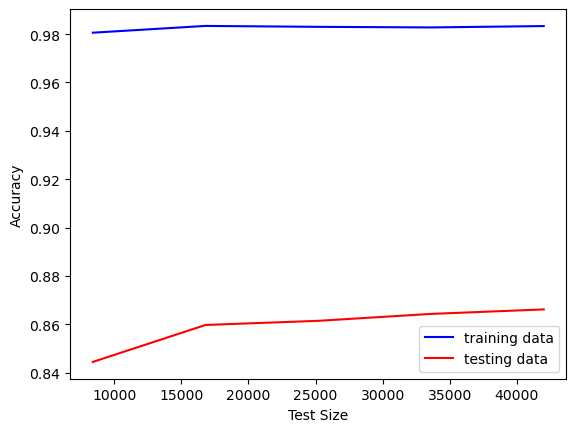

In [17]:
fig,axes = plt.subplots()
axes.set_xlabel("Test Size")
axes.set_ylabel("Accuracy")
axes.plot(tr_size,tr_score,"b-",label = "training data")
axes.plot(tr_size,te_score,"r",label = "testing data")
axes.legend()